In [79]:
!unzip /content/gold.zip

Archive:  /content/gold.zip
replace FINAL_USO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('/content/FINAL_USO.csv')

In [82]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800


In [83]:
df['Date'] = pd.to_datetime(df['Date'])

# Add 'Covid' and 'War' columns based on the specified years
df['Disease'] = df['Date'].dt.year.apply(lambda x: 1 if x in [2012, 2016] else 0)
df['War'] = df['Date'].dt.year.apply(lambda x: 1 if x in [2014, 2015] else 0)

In [84]:
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Disease,War
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,0,0


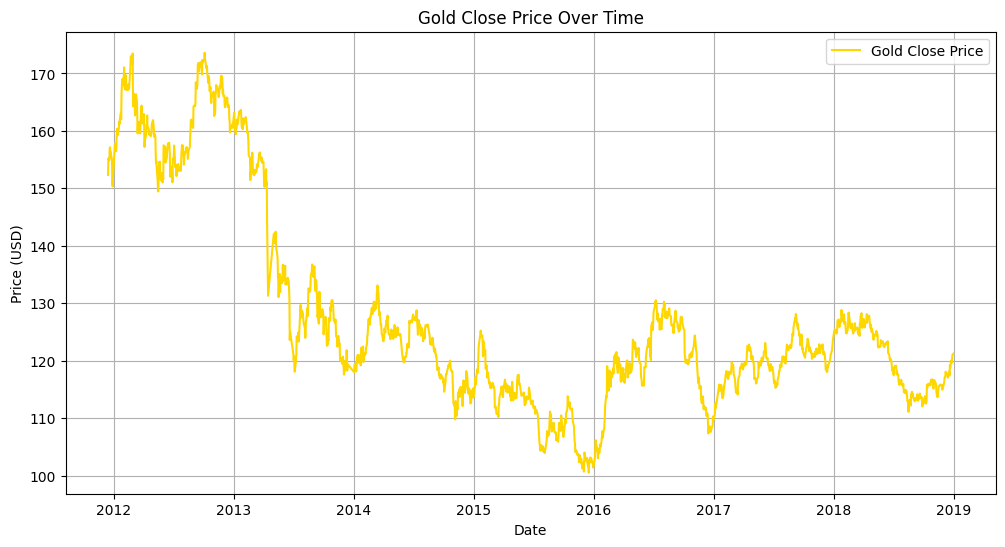

In [85]:
# Plot 1: Gold Prices (Close) Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Gold Close Price', color='gold')
plt.title('Gold Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

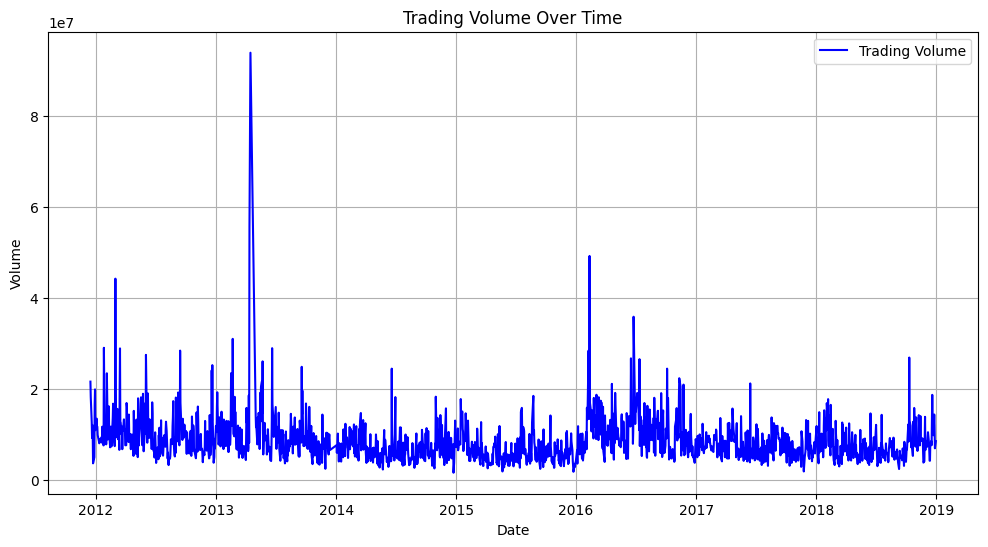

In [86]:
# Plot 2: Volume Traded Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Trading Volume', color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

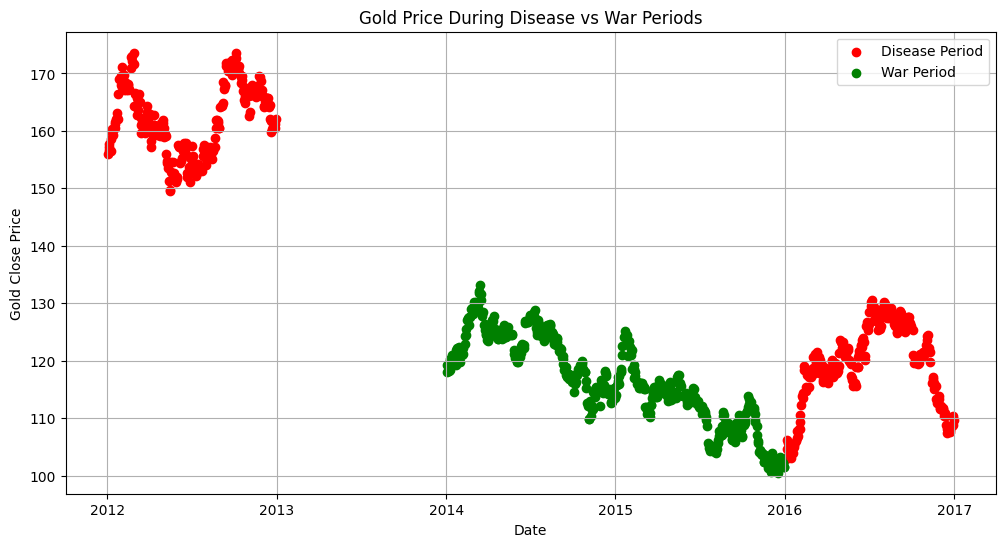

In [87]:
# Plot 3: Gold Price During Covid vs War Periods
plt.figure(figsize=(12, 6))
plt.scatter(df[df['Disease'] == 1]['Date'], df[df['Disease'] == 1]['Close'], label='Disease Period', color='red')
plt.scatter(df[df['War'] == 1]['Date'], df[df['War'] == 1]['Close'], label='War Period', color='green')
plt.title('Gold Price During Disease vs War Periods')
plt.xlabel('Date')
plt.ylabel('Gold Close Price')
plt.grid(True)
plt.legend()
plt.show()

In [88]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [89]:
# We will use Close as target as it is the final price of a commodity

In [90]:
y = df['Close']

In [91]:
X = df.drop(['Close'], axis=1)
X = df.drop(['Date'], axis=1)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=41)

#Using Linear Regression first .

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
linear_model = LinearRegression()

In [96]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [97]:
y_pred = linear_model.predict(X_test)

In [98]:
from sklearn.metrics import root_mean_squared_error

In [99]:
print(root_mean_squared_error(y_test,y_pred))

4.309720491916174e-08


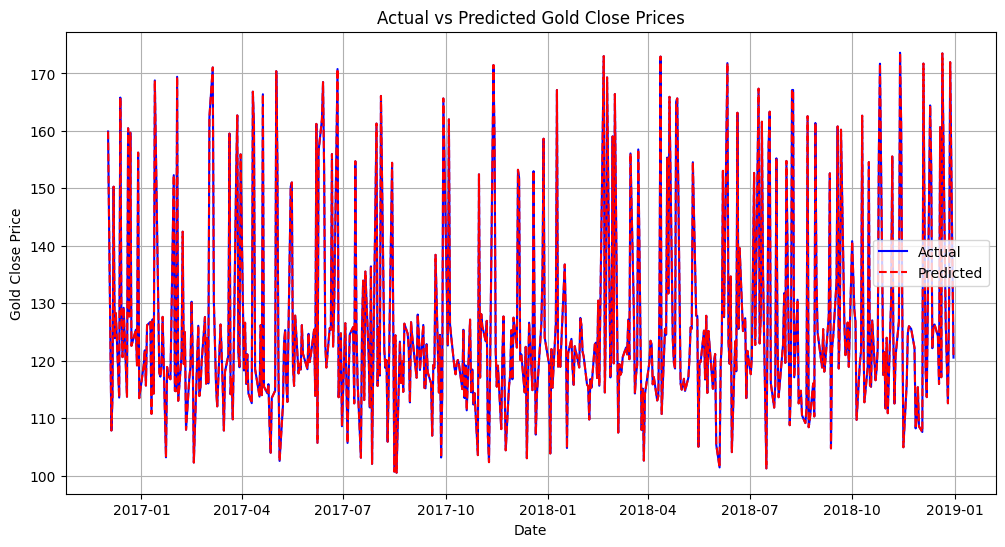

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
length = min(len(y_test), len(y_pred))
y_test = y_test[:length]
y_pred = y_pred[:length]


# Extract the corresponding dates for the test set from the DataFrame
dates = df['Date'].iloc[-length:]

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test, label='Actual', color='blue')
plt.plot(dates, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Gold Close Prices')
plt.xlabel('Date')
plt.ylabel('Gold Close Price')
plt.legend()
plt.grid(True)
plt.show()


#Using Decision Tree Regression

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
tree = DecisionTreeRegressor()

In [103]:
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(1202, 82) (516, 82) (1202,) (516,)


In [104]:
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [105]:
y_pred = tree.predict(X_test)

In [106]:
root_mean_squared_error(y_test,y_pred)

0.2185620931031679

<ipython-input-107-ea047999b381>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_contributions.index, y=top_10_contributions.values, palette='viridis')


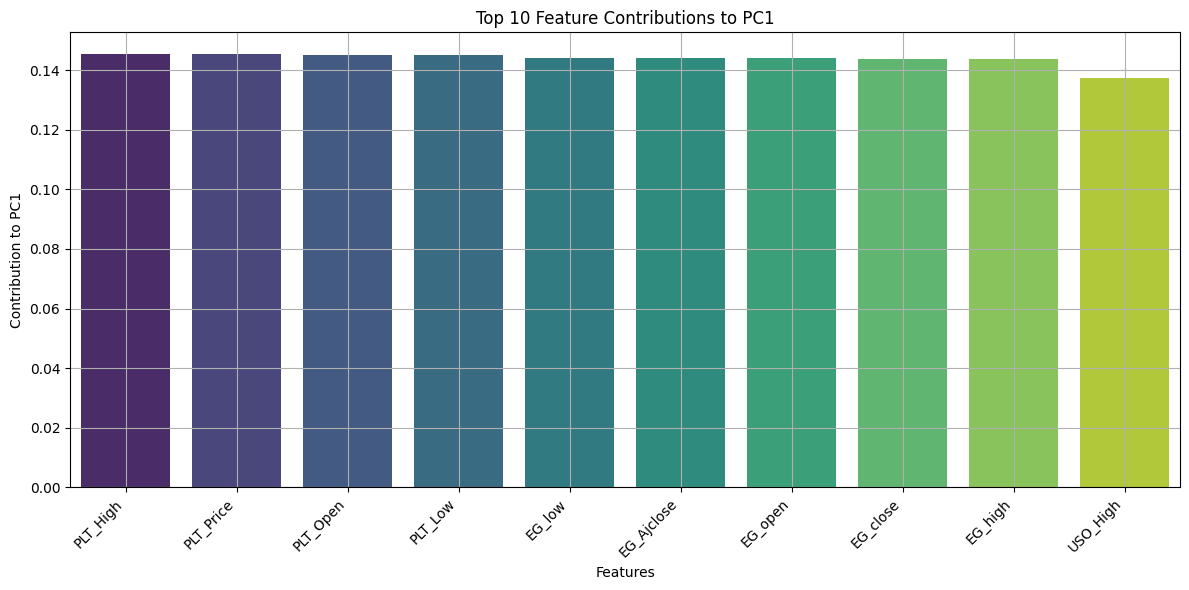

In [107]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns and drop non-relevant columns like 'Date' and 'Close'
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Close'], errors='ignore')

# Standardize the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Perform PCA analysis
pca = PCA(n_components=len(numeric_features.columns))
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca.components_, columns=numeric_features.columns, index=[f'PC{i+1}' for i in range(len(numeric_features.columns))])

# Get the top 10 and least 10 features contributing to the first Principal Component (PC1)
top_10_features = pca_df.iloc[0].abs().nlargest(10).index
least_10_features = pca_df.iloc[0].abs().nsmallest(10).index

# Extract their contributions
top_10_contributions = pca_df[top_10_features].iloc[0]
least_10_contributions = pca_df[least_10_features].iloc[0]

# Plot the top 10 contributing features to PC1
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_contributions.index, y=top_10_contributions.values, palette='viridis')
plt.title('Top 10 Feature Contributions to PC1')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contribution to PC1')
plt.xlabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-108-7ce298a579da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_10_contributions.index, y=least_10_contributions.values, palette='coolwarm')


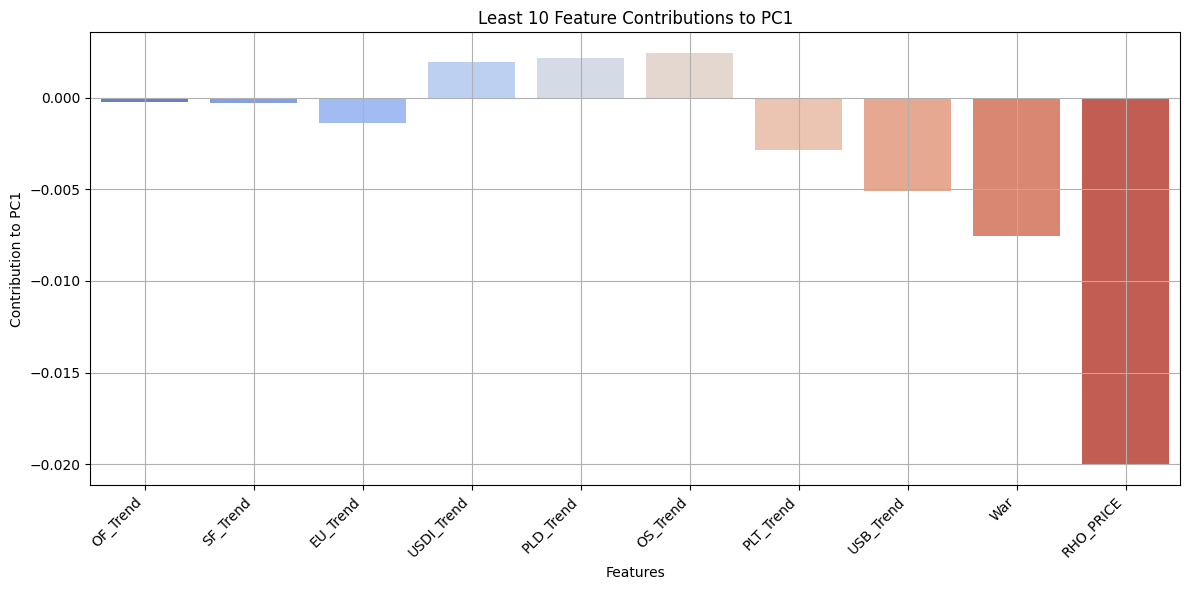

In [108]:
# The least 10 contributing features to PC1
plt.figure(figsize=(12, 6))
sns.barplot(x=least_10_contributions.index, y=least_10_contributions.values, palette='coolwarm')
plt.title('Least 10 Feature Contributions to PC1')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contribution to PC1')
plt.xlabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

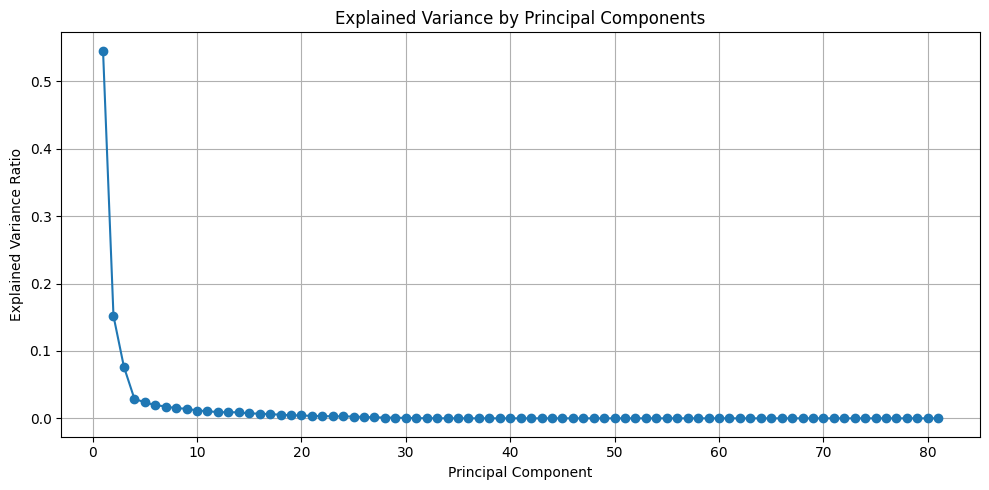

In [109]:

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()
